In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import binom 
from scipy.stats import norm
from scipy.stats import f
import scipy.stats as stats

# Q1. Binomial Distribution vs Normal Distribution


(1) Plot binomial distribution and normal distribution and compare them when n=10,100, and 1000 and p is fixed to be 0.5

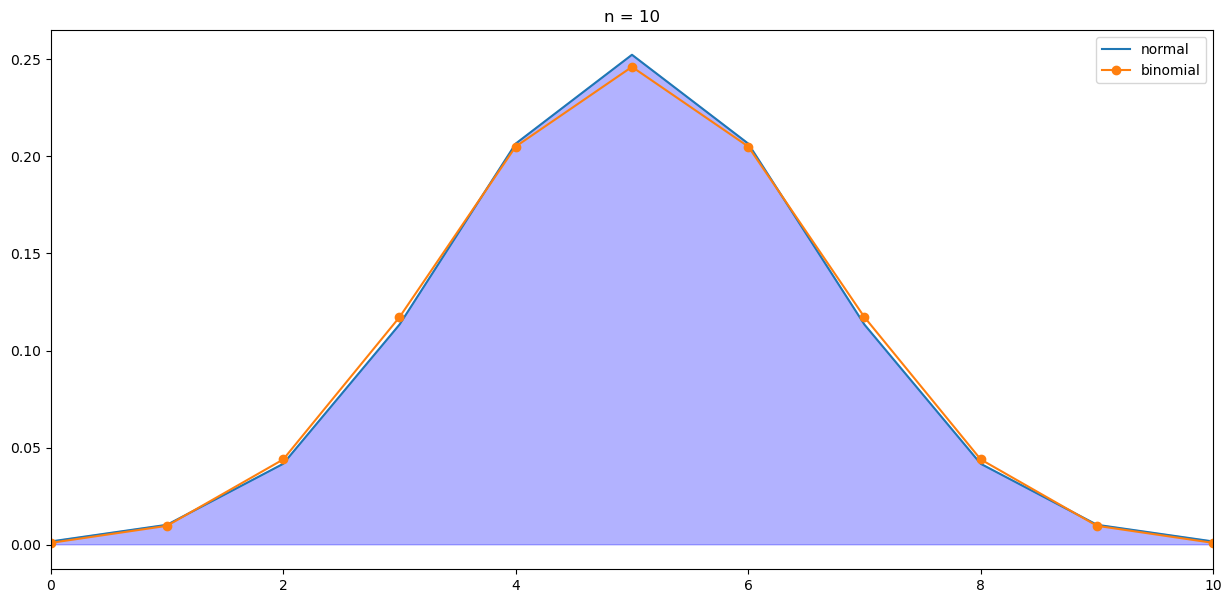

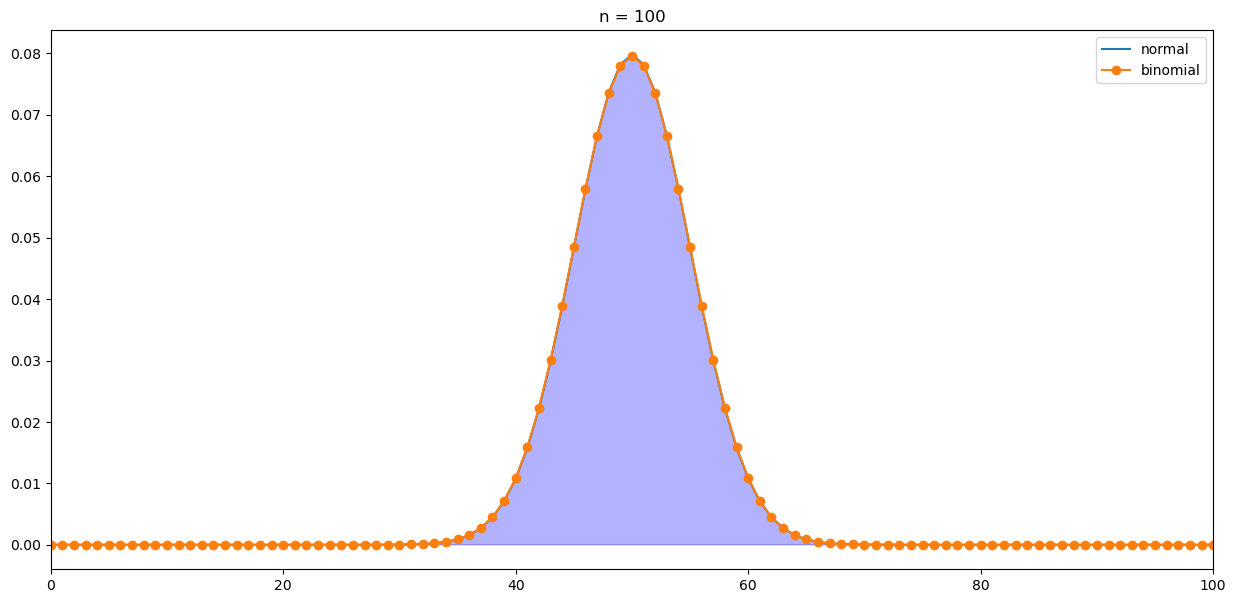

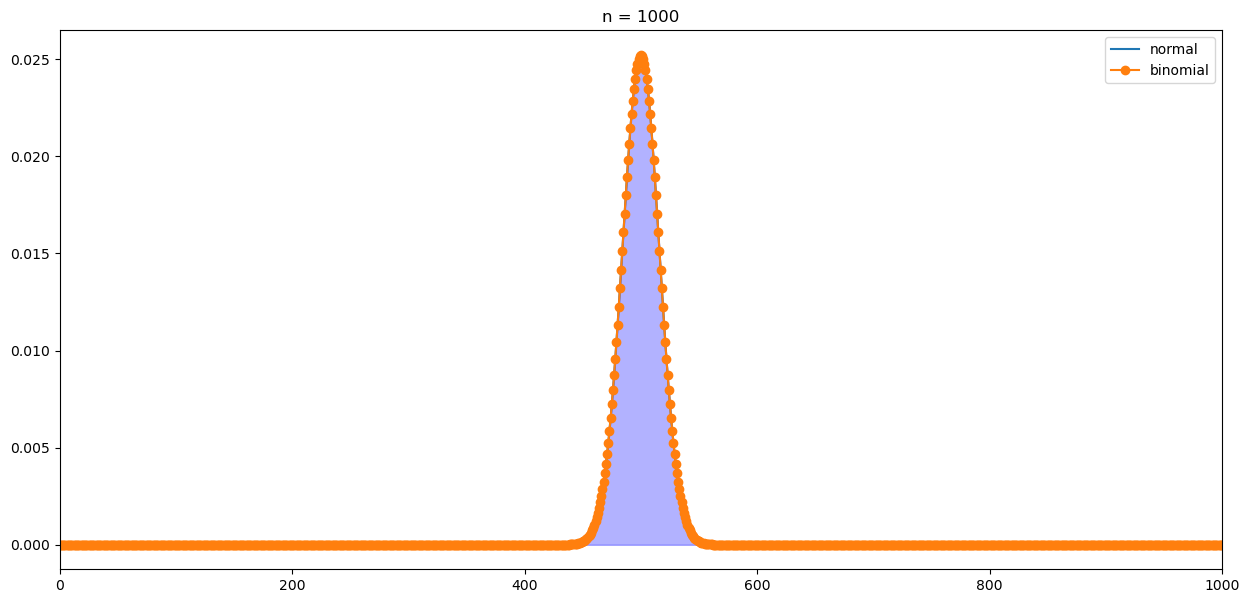

In [68]:
n_list = [10, 100, 1000] # n값 리스트
p = 0.5 # p 값

x_arr = np.arange(0, max(n_list) + 1, 1) # 0~n까지 1씩 증가 배열

for i in range(len(n_list)):
    n = n_list[i]

    # binomial distribution
    x = x_arr
    rv = binom(n, p)
    y = rv.pmf(x)

    # normal distribution
    rv1 = norm(loc=n*p,  scale=(n*p*p)**(1/2))
    y1 = rv1.pdf(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

    ax.plot(x, y1, label="normal", linestyle='solid')
    ax.fill_between(x, y1, color="blue",   alpha=0.3)

    ax.plot(x, y,label="binomial", marker='o')
    ax.legend()
    
    # x, y 축 범위
    ax.set_xlim(0, n_list[i])
#     ax.set_ylim(0, 0.5)
    
    # 그래프별 제목
    ax.set_title('n = {}'.format(n_list[i]))

plt.show()

(2) Describe what you observe when you do (1).

1.
normal distribution를 띄우는 과정에서 loc(mu) 값과 scale 값 설정 문제
- binomial과 동일하게 설정해야 하는데 잘 모르고 기본값인 0,1으로 설정했더니 그래프가 이상하게 나옴 (한 쪽 구석으로 치우친 직선 형태)
- scale도 함수로 설정하고 싶은데 어려워서 단순 곱셈과 루트 사용해서 해결하였음

2.
한 번에 띄우려고 for 함수를 사용해서 그래프를 띄웠는데, x축 범위가 동일하게 1000으로 설정되어서 시각화가 제대로 되지 않음
- for 함수 돌 때 마다 n 값 사용하여 xlim 지정하는 법 찾아 해결

3.
3개의 n값에 따른 두 개의 그래프를 각각 표시했지만, n =10 과 비교했을 때 n=1000 그래프의 경사가 너무 작아 뭔가 이상한 것 같음
- ylim을 지정하지 않으면 해결 될 문제였음
- n=1000 그래프를 단독으로 뽑아서 비교해 본 결과 y축 최대값이 0.025정도로 제대로 표시된 것이 맞음을 확인

4.
10~1000 그래프가 모두 겹쳐 나오는 문제 발생
- plt.show() 위치를 바로잡아 주었더니 위처럼 분리되어 나오도록 해결



(3) What do you observe when you change p from 0.5 to 0.6 in (1)?

- p=0.5로 설정하였을 때는 이항분포와 정규분포의 차이가 미미하였고, 시행횟수가 늘어날 수록 이항분포와 정규분포의 차이가 줄어드는 것을 볼 수 있었다. 
- 하지만 p=0.6으로 설정한 경우에는 이항분포와 정규분포간의 눈에띄는 차이가 보였다. 시행횟수와 관계없이 이항분포의 그래프가 정규분포 그래프의 상단에 위치함

- 또한 p가 0.5보다 작은 값을 갖게 되면(p<0.5) 오른쪽으로 꼬리가 긴 (skewed to the right)형태를 취하고, p가 0.5보다 큰 값을 가지면 반대의 형태(skewed to the left), p=0.5에서는 좌우 대칭의 형태를 띄게 되는 이항분포의 특성과도 일치한다는 것을 확인할 수 있었다. 


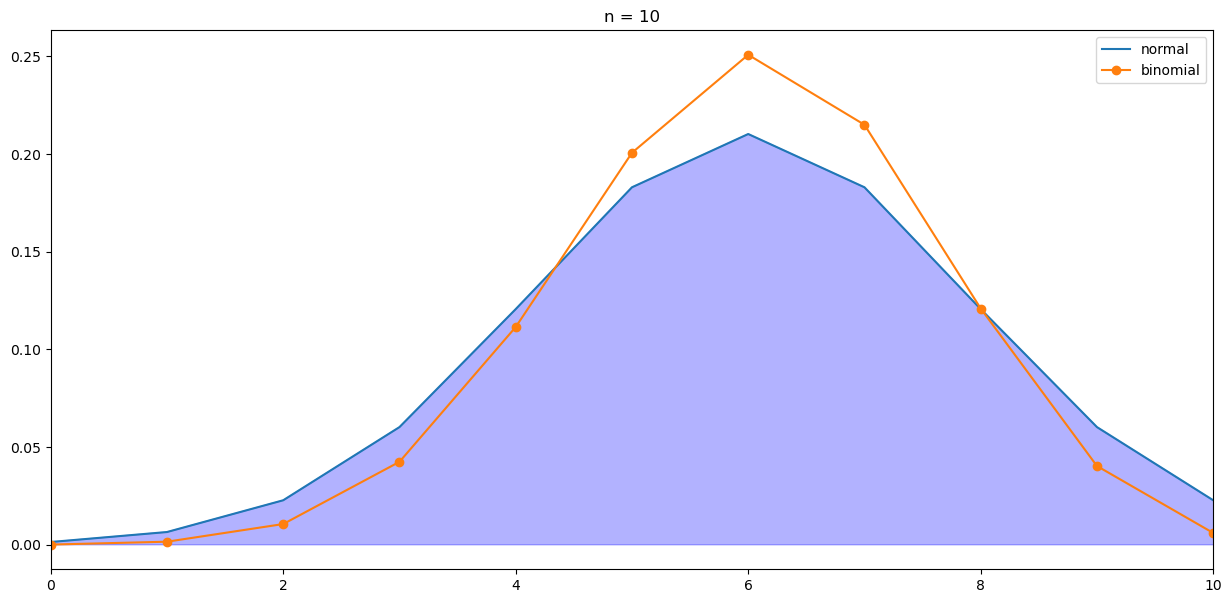

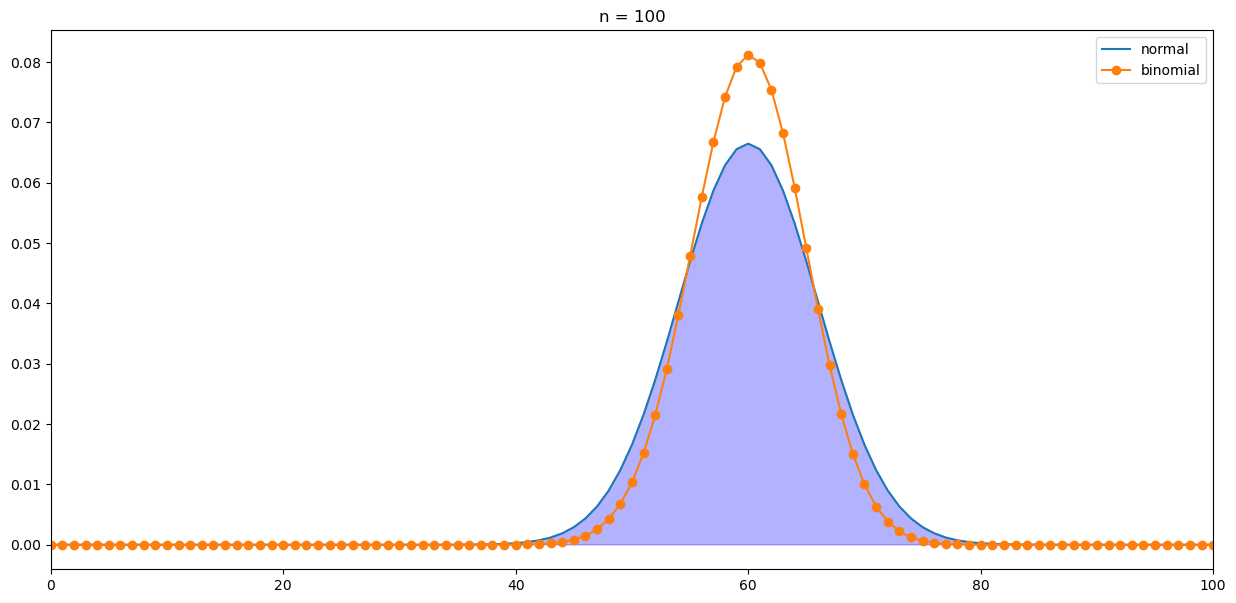

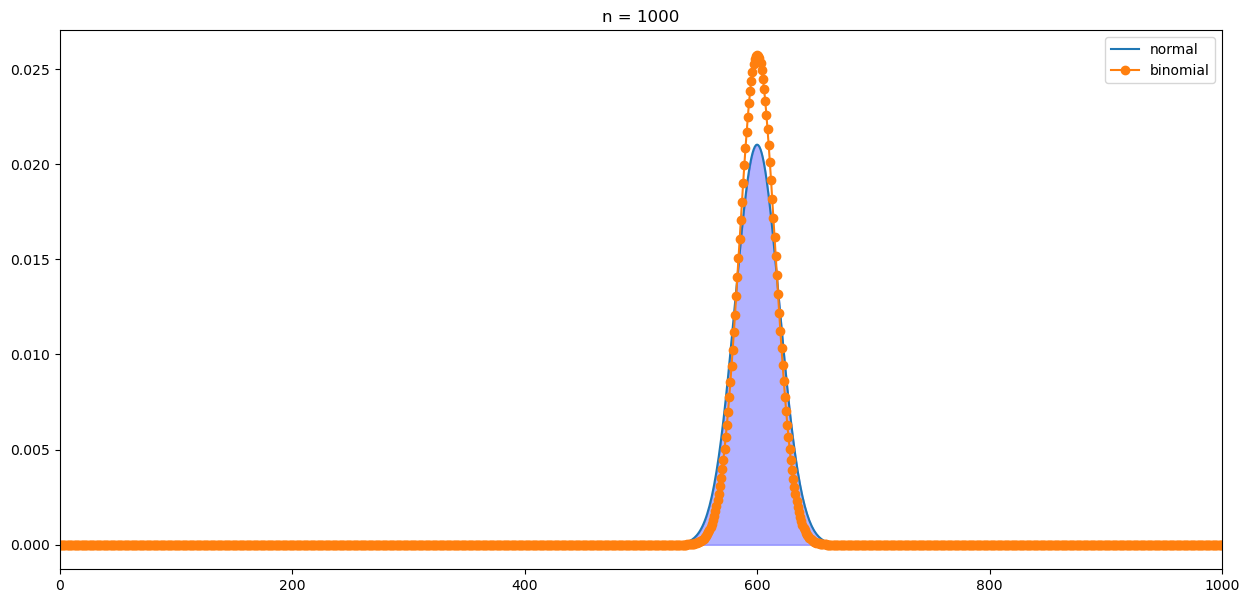

In [69]:
n_list = [10, 100, 1000] # n값 리스트
p = 0.6 # p 값

x_arr = np.arange(0, max(n_list) + 1, 1) # 0~n까지 1씩 증가 배열

for i in range(len(n_list)):
    n = n_list[i]

    # binomial distribution
    x = x_arr
    rv = binom(n_list[i], p)
    y = rv.pmf(x)

    # normal distribution
    rv1 = norm(loc=n*p,  scale=(n_list[i]*p*p)**(1/2))
    y1 = rv1.pdf(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

    ax.plot(x, y1, label="normal", linestyle='solid')
    ax.fill_between(x, y1, color="blue",   alpha=0.3)

    ax.plot(x, y,label="binomial", marker='o')
    ax.legend()
    
    # x, y 축 범위
    ax.set_xlim(0, n_list[i])
#     ax.set_ylim(0, 0.5)
    
    # 그래프별 제목
    ax.set_title('n = {}'.format(n_list[i]))

plt.show()

# Q2. Root Mean Squared Deviations

(1) Calculate the RMSD between binomial and normal distributions in Q1 by using n=10, 100, 1000 when p=0.5.

In [74]:
n_list = [10, 100, 1000] # n값 리스트
p = 0.5 # p 값

x_arr = np.arange(0, max(n_list) + 1, 1) # 0~n까지 1씩 증가 배열

for i in range(len(n_list)):
    n = n_list[i]

    # binomial distribution
    x = x_arr
    rv = binom(n, p)
    y = rv.pmf(x)

    # normal distribution
    rv1 = norm(loc=n*p,  scale=(n*p*p)**(1/2))
    y1 = rv1.pdf(x)
    
    # RMSE
    rmse = np.sqrt(np.sum(y-y1)**2/n)
    print('RMSE of n={} : '.format(n),rmse)


RMSE of n=10 :  6.422112260594828e-05
RMSE of n=100 :  2.2292551919017576e-17
RMSE of n=1000 :  9.898861821344038e-19


(2) Which case has the smallest RMSD? What can you conclude from these observations?

RMSE of n=10 > RMSE of n=100 > RMSE of n=1000

- n=1000에서 가장 작은 RMSE 값이 나온다. 시행 횟수가 늘어날 수록 정규분포에 가까워지는 것을 알 수 있다.


# Q3. Student’s t-distribution vs Standard Normal distribution

Using Q1 and Q2, and Python, show that student’s t-distribution approximately approaches the standard normal distribution when we increase the degree of freedom

- 자유도가 올라갈 수록 정규분포와 가까워지는 것을 확인할 수 있었다.

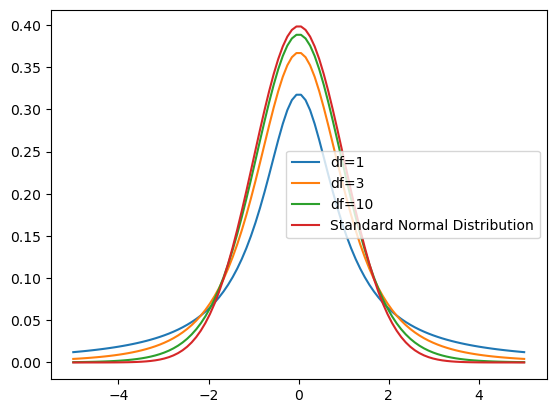

In [105]:
x = np.linspace(-5, 5, 100)

y1 = stats.t.pdf(x, 1)
y2 = stats.t.pdf(x, 3)
y3 = stats.t.pdf(x, 10)

# 정규분포랑 비교
y4 = stats.norm.pdf(x, 0, 1)

plt.plot(x, y1, label='df=1')
plt.plot(x, y2, label='df=3')
plt.plot(x, y3, label='df=10')
plt.plot(x, y4, label='Standard Normal Distribution')
plt.legend()
plt.show()

# Q4. Percentiles of F-distribution

(1) Calculate 95 percentile of f(20, 30) and 5 percentile of f(30,20). When you multiply 95 percentile of f(20, 30) and 5 percentile of f(30,20), what value do you have?

- 가설 검정 임계값을 구할 수 있다.

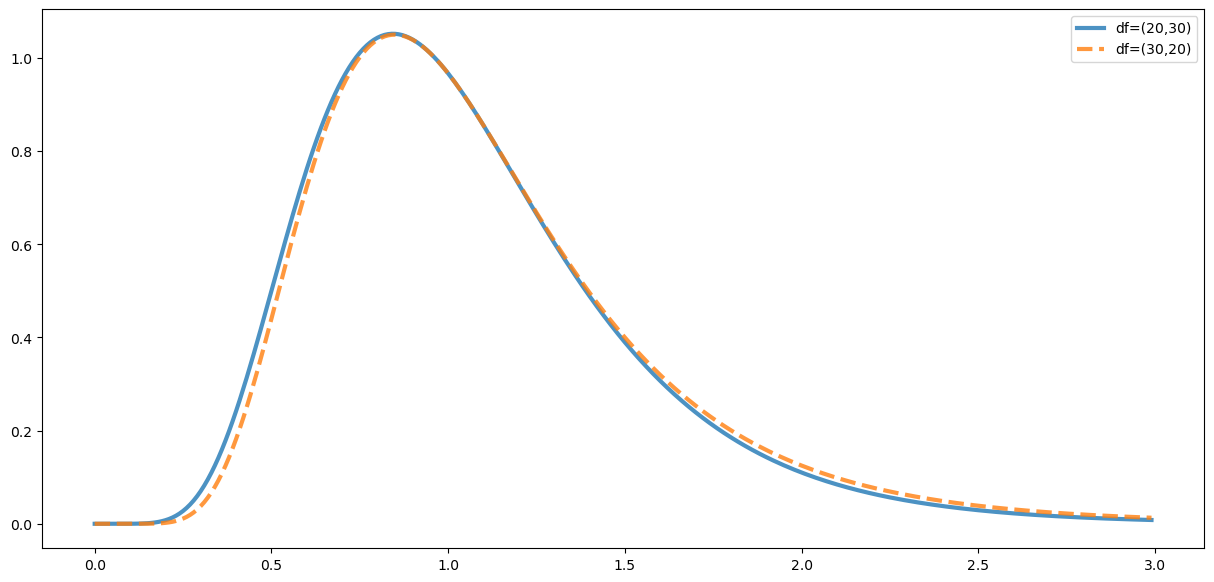

95% of f(20,30) :  1.931653475236928
5% of f(30,20) :  0.5176911971115028
multiply 95 percentile of f(20, 30) and 5 percentile of f(30,20) :  0.9999999999999999


In [113]:
rv1 = f(20, 30)
rv2 = f(30, 20)

x  = np.arange(0, 3, 0.01) 
y1  = rv1.pdf(x)
y2  = rv2.pdf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y1, lw=3, alpha=0.8, ls="-",  label="df=(20,30)") 
ax.plot(x, y2, lw=3, alpha=0.8, ls="--", label="df=(30,20)") 
ax.legend()

plt.show()

p95 = stats.f.ppf(0.95,20,30) # 95% of f(20,30)
p5 = stats.f.ppf(0.05,30,20) # 5% of f(30,20)

print('95% of f(20,30) : ', p95)
print('5% of f(30,20) : ', p5)
print('multiply 95 percentile of f(20, 30) and 5 percentile of f(30,20) : ', p95*p5)

(2) Now consider another pair of F-distributions: f(10,40) and f(40,10). Repeat the same calculations of (1). From these two examples, what can you guess?

- 반대되는 두 개의 자유도를 가진 분포의 경우 같은 f값을 가진다는 것을 알 수 있다.
- (그래프에서는 차이를 보이지만 이론상인 것 같음)
- 20, 30의 값을 사용한 (1)경우와 동일하게 임계값이 1에 가깝다.

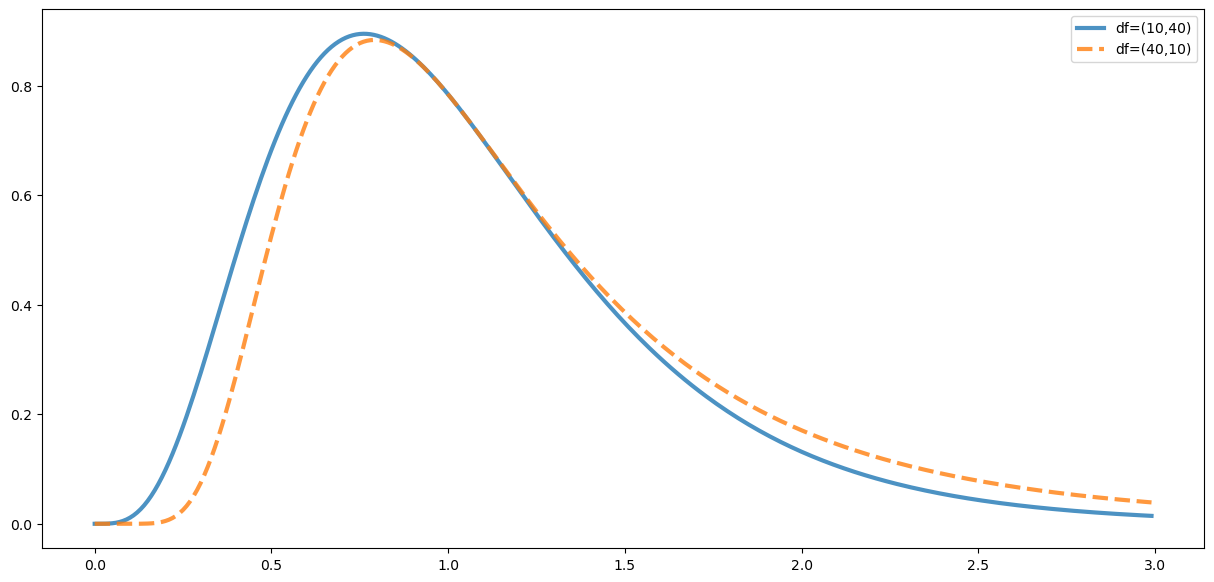

95% of f(10,40) :  2.077248046417209
5% of f(40,10) :  0.48140615740367526
multiply 95 percentile of f(10, 40) and 5 percentile of f(40,10) :  0.9999999999999999


In [114]:
rv3 = f(10, 40)
rv4 = f(40, 10)

x  = np.arange(0, 3, 0.01) 
y3  = rv3.pdf(x)
y4  = rv4.pdf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y3, lw=3, alpha=0.8, ls="-",  label="df=(10,40)") 
ax.plot(x, y4, lw=3, alpha=0.8, ls="--", label="df=(40,10)") 
ax.legend()

plt.show()

p95 = stats.f.ppf(0.95,10,40) # 95% of f(20,30)
p5 = stats.f.ppf(0.05,40,10) # 5% of f(30,20)

print('95% of f(10,40) : ', p95)
print('5% of f(40,10) : ', p5)
print('multiply 95 percentile of f(10, 40) and 5 percentile of f(40,10) : ', p95*p5)

# comment

전체적으로 잘 하셨습니다. 특히 1번문제에서 원하는 형태의 그래프를 얻기 위하여 코드를 바꾸어가시고 여러 시도를 통하여 해결하신 부분이 매우 좋습니다. p=0.6일 때, 이항분포와 정규분포가 다른 결과를 얻으셨는데, 정규분포에 사용하는 standard deviation을 잘못 계산하셨습니다. sqrt(n*p*(1-p))인데, sqrt(n*p*p)를 사용하셔서 두 개가 차이가 난 것으로 보입니다. 



마지막 문제에서 "반대되는 두 개의 자유도를 가진 분포의 경우 같은 f값을 가진다는 것을 알 수 있다."가 아니고, 

f(n1, n2)와 f(n2, n1)의 경우 서로 역수의 관계까 성립한다는 것입니다. 그렇기 때문에 서로를 곱했을 때 1이 나오는 것이지요. 